## NB03 - Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/Fide/fide_data.csv")

df = df.sort_values(by='date')

average_scores = df.groupby('date')[['standard', 'rapid', 'blitz']].mean()

player_scores = df.groupby(['name', 'date'])[['standard', 'rapid', 'blitz']].mean().reset_index()

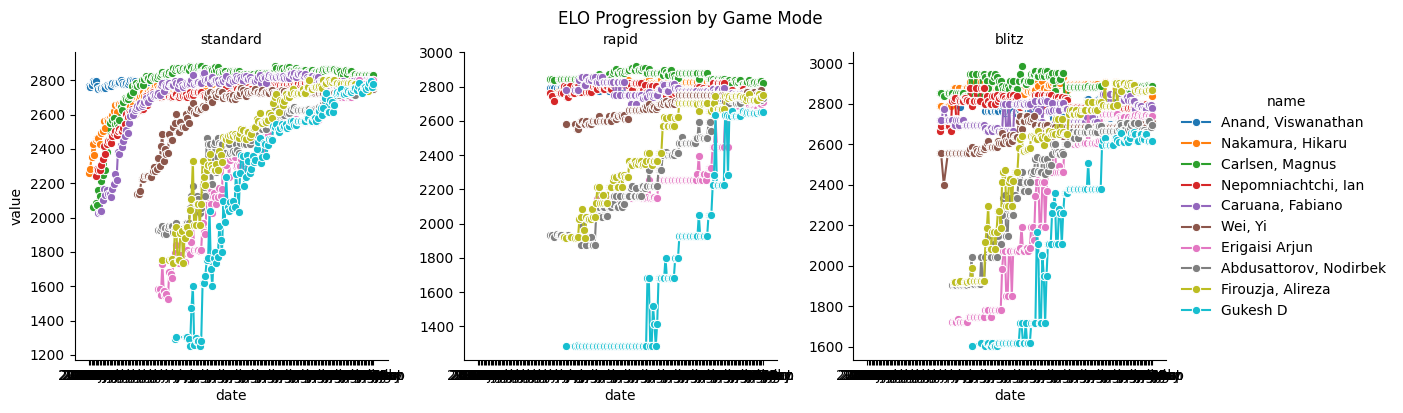

In [12]:
# Plot progression for each player
# FacetGrid for progression by game mode
g = sns.FacetGrid(df.melt(id_vars=['name', 'date'], value_vars=['standard', 'rapid', 'blitz']), 
                  col='variable', hue='name', sharey=False, col_wrap=3, height=4)
g.map(sns.lineplot, 'date', 'value', marker='o').add_legend()
g.set_titles("{col_name}")
g.fig.suptitle("ELO Progression by Game Mode", y=1.02)
plt.show()


In [14]:
# Add a new column for differences between modes
df['std_blitz_diff'] = df['standard'] - df['blitz']
df['std_rapid_diff'] = df['standard'] - df['rapid']
df['rapid_blitz_diff'] = df['rapid'] - df['blitz']

# Average differences by player
player_differences = df.groupby('name')[['std_blitz_diff', 'std_rapid_diff', 'rapid_blitz_diff']].mean()
print(player_differences)


                         std_blitz_diff  std_rapid_diff  rapid_blitz_diff
name                                                                     
Abdusattorov, Nodirbek        65.041379      145.723684        -87.096552
Anand, Viswanathan            -2.707143        3.888158         -8.085714
Carlsen, Magnus              -36.615894       -7.576159        -29.039735
Caruana, Fabiano              51.178808       23.642336         26.897810
Erigaisi Arjun                86.137931      189.777778       -110.256410
Firouzja, Alireza             -7.935714       97.107143       -105.042857
Gukesh D                     266.154472      526.313869       -313.235772
Nakamura, Hikaru            -104.238411      -40.527397        -66.938356
Nepomniachtchi, Ian          -46.701987      -31.774834        -14.927152
Wei, Yi                       43.635762       28.291971         25.153285


          standard     rapid     blitz
standard  1.000000  0.878404  0.933240
rapid     0.878404  1.000000  0.930534
blitz     0.933240  0.930534  1.000000


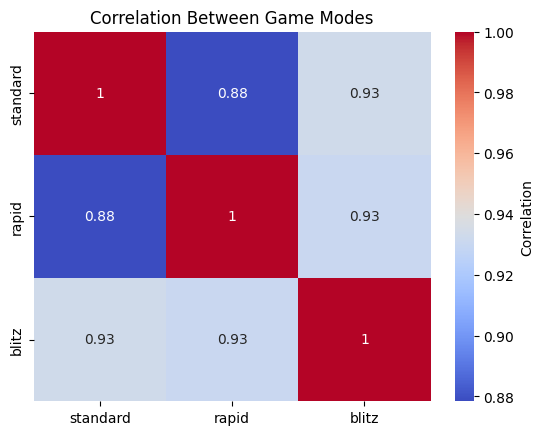

In [16]:
correlation = df[['standard', 'rapid', 'blitz']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Between Game Modes")
plt.show()

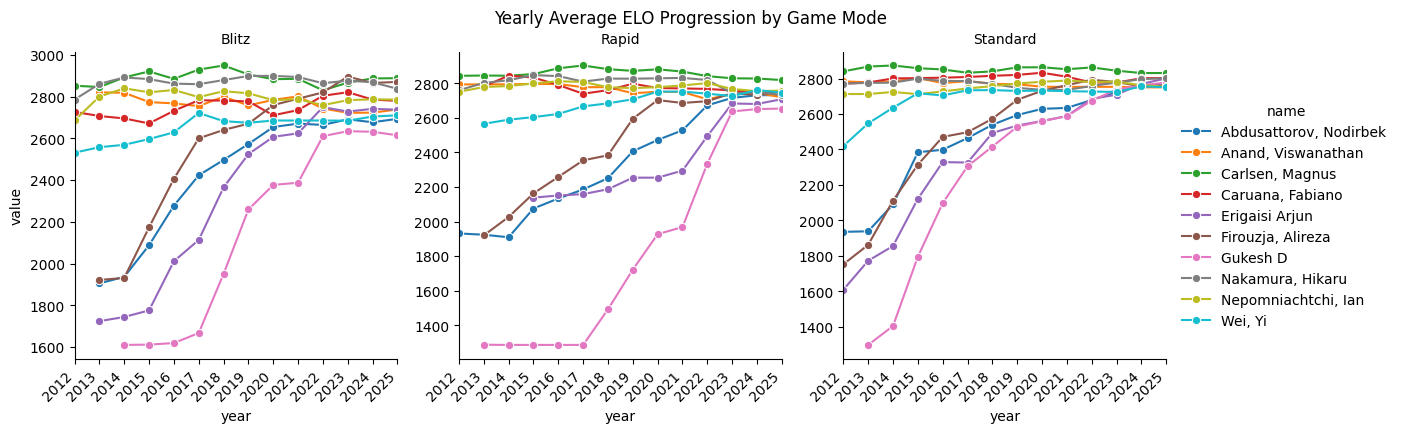

In [33]:
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df['year'] = df['date'].dt.year  # Extract the year

# Melt the dataframe
melted_df = df.melt(id_vars=['name', 'date', 'year'], value_vars=['standard', 'rapid', 'blitz'])

# Calculate average ELO per year for each player and game mode
df_avg_yearly = (
    melted_df.groupby(['name', 'year', 'variable'], as_index=False)
             .agg({'value': 'mean'})
)

# Capitalize the game modes
df_avg_yearly['variable'] = df_avg_yearly['variable'].str.capitalize()

# Create the FacetGrid
g = sns.FacetGrid(df_avg_yearly, col='variable', hue='name', sharey=False, col_wrap=3, height=4)
g.map(sns.lineplot, 'year', 'value', marker='o').add_legend()

# Set x-axis limits and slant labels
for ax in g.axes.flat:
    ax.set_xlim(2012, df_avg_yearly['year'].max())  # Set xlim from 2010 to max year
    ax.set_xticks(range(2012, df_avg_yearly['year'].max() + 1))  # Set x-ticks as integer years
    ax.set_xticklabels(range(2012, df_avg_yearly['year'].max() + 1), rotation=45, ha="right")  # Slant the labels

# Set titles and display
g.set_titles("{col_name}")
g.fig.suptitle("Yearly Average ELO Progression by Game Mode", y=1.02)
plt.show()
